# <ins>Tutorial 3.3 (Bonus): Advanced Plotting & Customization</ins>
*ASTR 211: Observational Astronomy, Spring 2021* \
*Written by Mason V. Tea*

Below are some methods for making your plots look nicer, but it's doubtful that you'll be asked to replicate any of it in this or any of the upper-level courses. However, for publication-ready research figures (and aesthetic purposes), it's good to at least touch on briefly.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Subplots

Subplots are plots with more than one... plot. What I mean is that you can generate multiple figures in one, with or without matching axes, plot types, whatever. For example, let's work on putting our line function and histogram into a subplot. First, we'll get our data back.

In [25]:
# Histogram data
hist1 = np.random.randn(1000)
hist2 = np.random.normal(0,2,1000)
hist3 = np.random.normal(1.5,3,1000)

# Line data
x = np.linspace(0,100,20)  
y = 3*x + 6               
dy_sym = np.zeros(20)+10                            
dy_asym = [np.zeros(20)+15, np.linspace(0,100,20)]  

Now, let's try getting both of these in the same figure, without overplotting them. We've been calling the functions for plots explicitly up until now (i.e. `plot()`, `scatter()`, etc.) and `matplotlib` has been automatically setting up the axis and figure. What we want to do now is separate the figure and axes so that we can manipulate them at will. That will make sense in a second.

So, in order to get the axes and figure separate, we have to generate them using the `subplots()` function. It takes 2 main arguments, which determine the size of the figure. For example, if I want a figure that is 2 plots tall by 1 plot wide, I can call `subplots(2,1)`, which I'll _unpack_ into the figure and axes separately.

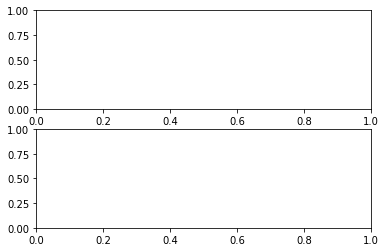

In [26]:
fig, ax = plt.subplots(2,1)

As you can see, all this generates is an empty 2x1 plot with empty axes. Now, we want to fill them with our data. While the `fig` variable holds all the directions for setting up this blank figure, the `ax` variable here is a list of two elements, corresponding to the top plot and the bottom plot, in that order, which holds all the data. We can change the contents of each plot by editing these elements. It'll be easier to see once I demonstrate --- let's add our data.

Text(0, 0.5, 'N')

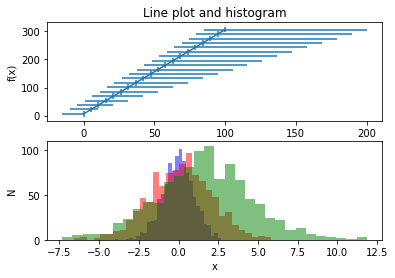

In [27]:
fig, ax = plt.subplots(2,1)

ax[0].errorbar(x,y,yerr=dy_sym,xerr=dy_asym)
ax[0].set_title("Line plot and histogram")
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')

ax[1].hist(hist1, bins=30, alpha=0.5, color='blue')
ax[1].hist(hist2, bins=30, alpha=0.5, color='red')
ax[1].hist(hist3, bins=30, alpha=0.5, color='green')
ax[1].set_xlabel("x")
ax[1].set_ylabel('N')

So, what we've done is add all the normal pieces of our plot (title, axes, data) to each of the elements in axes, building up our plot the same way we did with `plt.<function>` in the earlier sections, where `pyplot` did everything for us. The top plot's data is held in `ax[0]`, the first element of `ax`, while the bottom plot's is held in `ax[1]`, the second element.

Notice, too, that I've omitted the title for `ax[1]` -- the spacing with subplots is tricky, and its better to leave it out, as it overlaps with the x-axis label.

Let's say that these plots correspond to the same data --- for example, radio and X-ray intensity over the course of the same time period for an object. In this case, we might want the two to share the time axis. To accomplish this, we can add the argument `sharex=True` to the `subplots()` function.

Text(0, 0.5, 'N')

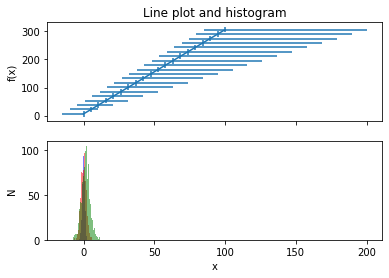

In [28]:
fig, ax = plt.subplots(2,1,sharex=True)

ax[0].errorbar(x,y,yerr=dy_sym,xerr=dy_asym)
ax[0].set_title("Line plot and histogram")
# ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')

ax[1].hist(hist1, bins=30, alpha=0.5, color='blue')
ax[1].hist(hist2, bins=30, alpha=0.5, color='red')
ax[1].hist(hist3, bins=30, alpha=0.5, color='green')
ax[1].set_xlabel("x")
ax[1].set_ylabel('N')

The two plots we already have don't exactly exist on the same scale, so you can see that the bottom plot has been squished a bit. (We can get rid of the x-axis label on the top plot as well, since they should be the same now.) You can do the same for the y-axis, if you like, in the same fashion with `sharey=True`.

A 2x1 plot isn't the only configuration, of course. You can add basically as many as you want. When you have multiple rows _and_ columns, however, each plot now has two indices: one for its row and one for its column. For example, let's create a 2x2 figure:

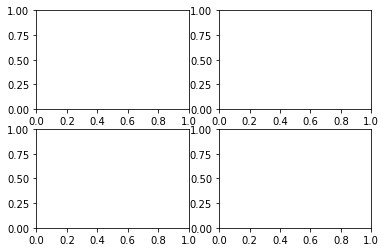

In [29]:
fig, ax = plt.subplots(2,2)

The more plots you add, the more compact axes seem to get. To mitigate this, you can use the function `tight_layout()` on the `fig` variable.

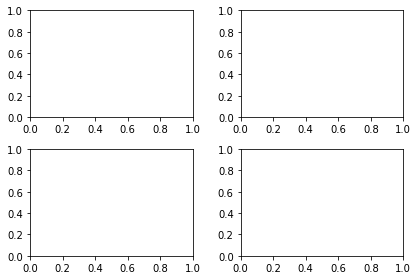

In [30]:
fig, ax = plt.subplots(2,2)
fig.tight_layout()

Better. These plots are labelled with coordinates of the form (row, column), where both start at 0. For example, the top right panel is at (0,0) and the bottom left is (1,1). You can use these indices to edit them in the `ax` list, like so:

Text(203.36818181818177, 0.5, 'f(x)')

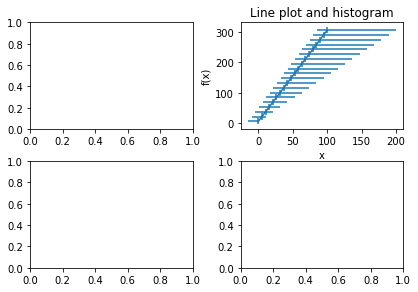

In [31]:
fig, ax = plt.subplots(2,2)
fig.tight_layout()

ax[0][1].errorbar(x,y,yerr=dy_sym,xerr=dy_asym)
ax[0][1].set_title("Line plot and histogram")
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('f(x)')

Here, I've just put our line plot in the (0,1) position. You can easily extrapolate for the rest based on the syntax above. If you want the x- or y-axes to be shared, you can again use `sharex` or `sharey` in `subplots()`; if you'd like for _only_ the cols/rows to share the x-axes or _only_ the cols/rows to share the y-axis, you can add `sharex=<'row' or 'col'>` and/or `sharey=<'row' or 'col'>` to `subplots()`.

Text(232.61818181818177, 0.5, 'f(x)')

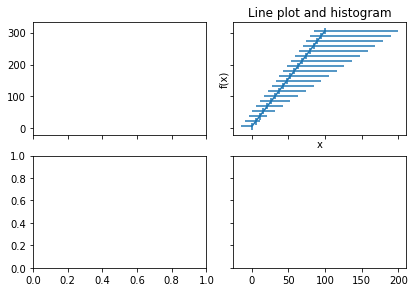

In [32]:
fig, ax = plt.subplots(2,2, sharex='col', sharey='row')
fig.tight_layout()

ax[0][1].errorbar(x,y,yerr=dy_sym,xerr=dy_asym)
ax[0][1].set_title("Line plot and histogram")
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('f(x)')

If you want, you can even set up a single plot using this syntax, basically a subplot with a single figure. For some of the more advanced customization features, this is preferable.

Text(0, 0.5, 'f(x)')

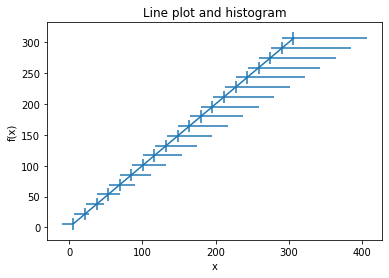

In [37]:
fig, ax = plt.subplots()

ax.errorbar(x,y,yerr=dy_sym,xerr=dy_asym)
ax.set_title("Line plot and histogram")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## Custom axes

Stepping away from subplots for now (though all of these methods can be applied to them the same as any other plot), let's talk about customizing the axes. We saw how to apply a log scale in earlier sections, so let's see that one more time:

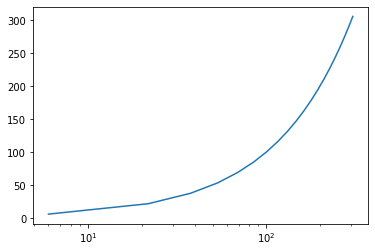

In [33]:
x = np.linspace(0,1000,1000)
x = y

plt.plot(x,y)
plt.xscale('log')

Notice that there are smaller (minor) ticks in between the big (major) ones at specific intervals. What if we want that kind of detail on a linear plot? We'll first need to import a tool from `matplotlib.ticker` called `MultipleLocator()` which, well, locates multiples of a given number on an axis, so you can place tickmarks there.

In [34]:
from matplotlib.ticker import MultipleLocator

Now, we can use `MultipleLocator()` to find places for `matplotlib` to place our minor tickmarks. One caveat, however, is that the plot has to be set up as a subplot with one figure, like at the end of the last section.

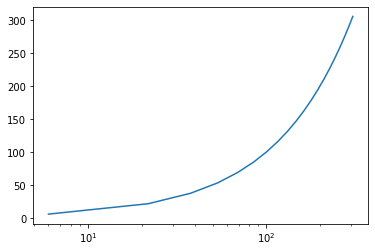

In [40]:
fig, ax = plt.subplots()

ax.plot(x,y)
ax.set_xscale('log')

The major tickmarks on the y-axis of our plot above increment by tens, so let's add minor ticks at multiples of 10. Once we've found our increments, we can use `ax.yaxis.set_minor_locator(<multiples from MultipleLocator>)` to add the ticks. (Of course, the same can be done to the y-axis, when it is linearly scaled like normal.)

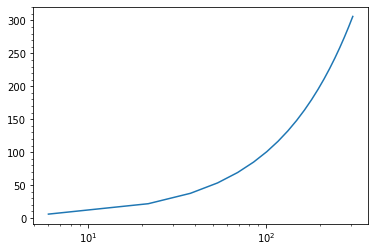

In [41]:
fig, ax = plt.subplots()

Yminorlocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(Yminorlocator)

ax.plot(x,y)
ax.set_xscale('log')

There they are. What if you want ticks all around the plot, including on the top and righthand side? For this, we need to mess around with the `tick_params` (tick parameters). We can open the tick parameters for the axis with `ax.tick_params` and change the settings. There are a bunch of different arguments you can change (and I encourage you to try it out yourself), but I'll give you the settings I use as an example (and elaborate no more).

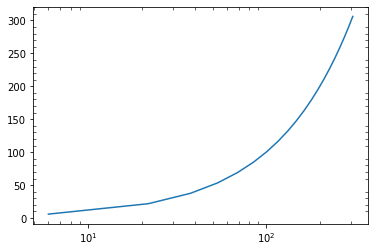

In [42]:
fig, ax = plt.subplots()

Yminorlocator = MultipleLocator(10)
ax.yaxis.set_minor_locator(Yminorlocator)

ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

ax.plot(x,y)
ax.set_xscale('log')

## Annotation

Very quickly, you can add text to your plot with the `text()` function. All you have to give it is the coordinates that you want the text to appear at and the text itself, like so:

Text(10, 200, 'Hello world')

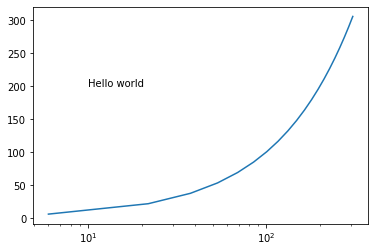

In [45]:
plt.plot(x,y)
plt.xscale('log')
plt.text(10,200,"Hello world")

There's my text at (10,200). Positioning text is often tricky, and unfortunately I don't have much advice to give on the matter. I typically leave it to my axes, title, and legend to do the talking (and, if those fail to do the trick, a figure description). It's nice to know how to do, however, in case you want to label a datapoint or a specific feature. 

Another cool thing you can do with strings in `matplotlib` figures is use $\LaTeX$, which is a typesetting language that we'll talk about more towards the end of the course/final project. The main reason to use this when plotting is [the many, many, many mathematical symbols that it has to offer](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols).

For example, if the plot above had wavelength ($\lambda$) on the x-axis and the Hubble constant ($H_0$) on the y-axis (which, to be clear, makes _no_ sense), I could use _r-strings_ when I label my axes. This literally just means putting an "r" in front of your string --- once you do that, you can type $\LaTeX$ commands and super/subscript things surounded by dollar signs (math mode).

Text(0, 0.5, '$H_0$')

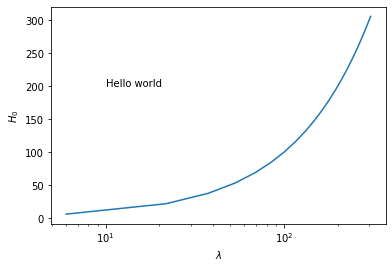

In [47]:
plt.plot(x,y)
plt.xscale('log')
plt.text(10,200,"Hello world")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$H_0$')

You can do this in titles, text, and legend labels within the figure as well.

Also, if you wanted to add a grid, you can do so with `plt.grid(True)`. I personally don't like using them, but it comes in handy sometimes.

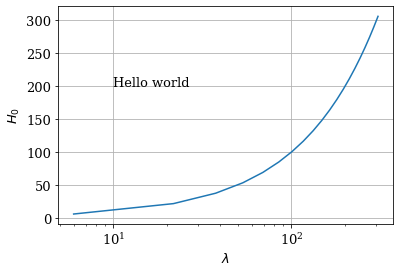

In [53]:
plt.plot(x,y)
plt.xscale('log')
plt.text(10,200,"Hello world")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$H_0$')
plt.grid(True)

## Font

You might notice that the labels in the plot above are a bit small. Also, all the font in our plots so far has been in Arial, which is very much inferior to Times New Roman, imo. So, in order to change the font and its size, we can add the `plt.rc()` function with the `"font"` argument, along with the stuff we want to change:

Text(0, 0.5, '$H_0$')

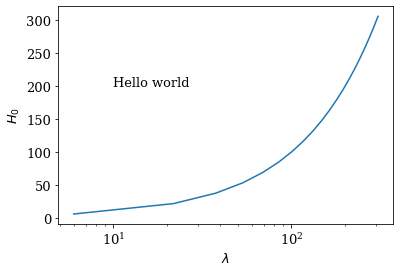

In [52]:
plt.rc("font", size=13, family='serif')

plt.plot(x,y)
plt.xscale('log')
plt.text(10,200,"Hello world")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$H_0$')

## Stylesheets

Last but not least, if you don't care about going through all the steps of customizing your plot, but you still don't want it to look like the default, you can choose [one of many stylesheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) to automatically style your plots. Adding the line `plt.style.use('<stylesheet name>')` formats the plots that follow. One of my favorites is `dark_background`, just because the contrast looks cool.

Text(0, 0.5, '$H_0$')

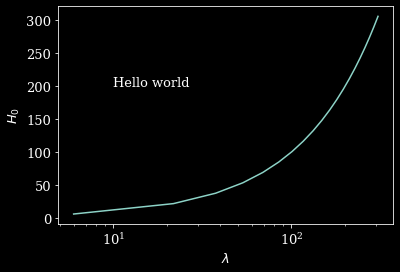

In [55]:
# plt.rc("font", size=13, family='serif')

plt.style.use('dark_background')

plt.plot(x,y)
plt.xscale('log')
plt.text(10,200,"Hello world")
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$H_0$')